# Spin Chain to Fermion Hopping

So here we do the opposite of what we did in lindblad_hopping_qtip: We start with a chain of spins and we want to use the JW tranformation to express it as a chain of hopping fermions. Why do we want this? Because Qutip is built for **spins**, and we eventually want to work with **fermions with spins**. For that we need to be able to express Spin sites in terms of fermions while including the spin degrees of freedom.

For the case of a single particle, it makes no difference whether we have spinfull or spinless fermions, but since we want to consider more particles and more complex systems we need to build up to it like this

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import itertools

from qutip import  *

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
L = 4 # Num of sites
D = 2 # local hilbert space
J = 1 # interaction
gamma = 0.2 # the dephasing term for the collapse operators
max_t = 40 # maximum time
tsteps = 1000 # number of time steps

Sup =  sigmap() # creation
Sdown = sigmam() # annihilation
num_op = Sup*Sdown 

colapse_operator = np.sqrt(gamma)*num_op 
# colapse_operator = Sdown
expect_operator = num_op # for the expectation value tracking

initial_conditions = np.zeros(L**2) # initial conditions of the density matrix
initial_conditions[0] = 1.0


In [3]:
# create the hamiltonian as a tensor product
ident_tensor = tensor([identity(D)]*L) 
H = 0*ident_tensor
# define the exponential operators for the JW string
expo_minus = (-1j*np.pi*num_op).expm()
expo_plus = (1j*np.pi*num_op).expm()
    
for site_j in range(0,L-1):
    # create the jordan-wigner for aj^dagger aj+1 
    Spin_j = Sup # site j
    Spin_jp1 = Sdown # site j+1

    JW = [identity(2)]*L
    # list slicing does not work that well with these things so ill just do it with a loop
    for lop in range(0,site_j):
        JW[lop] = expo_minus*expo_plus
    JW[site_j] = Spin_j*expo_plus
    JW[site_j+1] = Spin_jp1

    # now the hermitian conjugate of this aj aj+1^dagger
    Spin_j = Sdown # site j
    Spin_jp1 = Sup # site j+1

    JW_conj = [identity(2)]*L
    for lop in range(0,site_j):
        JW_conj[lop] = expo_minus*expo_plus
    JW_conj[site_j] = expo_minus*Spin_j
    JW_conj[site_j+1] = Spin_jp1
    
    # add the new term to the hamiltonian
    H+= -0.5*J*( tensor(JW)+ tensor(JW_conj))

H

Quantum object: dims=[[2, 2, 2, 2], [2, 2, 2, 2]], shape=(16, 16), type='oper', dtype=Dense, isherm=True
Qobj data =
[[ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0. ]
 [ 0.   0.  -0.5  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0. ]
 [ 0.  -0.5  0.   0.  -0.5  0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0. ]
 [ 0.   0.   0.   0.   0.  -0.5  0.   0.   0.   0.   0.   0.   0.   0.
   0.   0. ]
 [ 0.   0.  -0.5  0.   0.   0.   0.   0.  -0.5  0.   0.   0.   0.   0.
   0.   0. ]
 [ 0.   0.   0.  -0.5  0.   0.  -0.5  0.   0.  -0.5  0.   0.   0.   0.
   0.   0. ]
 [ 0.   0.   0.   0.   0.  -0.5  0.   0.   0.   0.  -0.5  0.   0.   0.
   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  -0.5  0.   0.
   0.   0. ]
 [ 0.   0.   0.   0.  -0.5  0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0. ]
 [ 0.   0.   0.   0.   0.  -0.5  0.   0.   0.   0.  -0.5  0.   0.   0.
   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.  -0.5  0.   

In [4]:
basis(D,0) # this is spin up 
basis(D,1) # this is spin down
basis_list = []

# Create the basis vectors, for this case there is a !!single!! spin up
for site in range(0,L):
    # initialize everything in down state
    single_state_list = [basis(D,1)]*L
    # flip the spin up the spin in site
    single_state_list[site] = basis(D,0)
    # notice how there is only one spin up (one particle states)
    ket = tensor(single_state_list)
    basis_list.append(ket)

# initialize the density matrix
# make all possible 2 elemet combinations where order matters so we can get the density matrix
combination_list = list(itertools.product(basis_list, basis_list))

# initialize a density matrix object that is full of zeros
rho = 0*combination_list[0][0]*combination_list[0][1].dag()

# build the density matrix
for i in range(0,len(combination_list)):
    rho += initial_conditions[i]*combination_list[i][0]*combination_list[i][1].dag()
    
rho

Quantum object: dims=[[2, 2, 2, 2], [2, 2, 2, 2]], shape=(16, 16), type='oper', dtype=Dense, isherm=True
Qobj data =
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

In [5]:
# create the collapse operators. Can be densities or ladder local operators
# also creates the operators to track the relevant expectation values, mostyle densities
collapse_ops = []
expect_ops = []

for j in range(0,L):
    # for collapse operators
    op_list = [identity(D)]*L
    op_list[j] = colapse_operator
    nj = tensor(op_list)
    collapse_ops.append(nj)
    
    # for the expectation values
    op_list = [identity(D)]*L
    op_list[j] = expect_operator
    nj = tensor(op_list)
    expect_ops.append(nj)

In [6]:
times = np.linspace(0.0, max_t, tsteps)

result = mesolve(H, rho, times, c_ops=collapse_ops , e_ops=expect_ops)

result

<Result
  Solver: mesolve
  Solver stats:
    method: 'scipy zvode adams'
    init time: 0.00013589859008789062
    preparation time: 0.0002219676971435547
    run time: 0.15782499313354492
    solver: 'Master Equation Evolution'
    num_collapse: 4
  Time interval: [0.0, 40.0] (1000 steps)
  Number of e_ops: 4
  State not saved.
>

Text(0, 0.5, 'local densities')

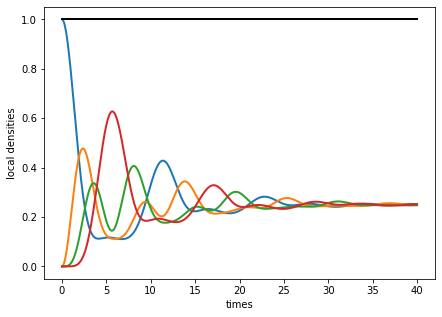

In [7]:
fig, ax = plt.subplots(1,1, figsize=(7,5))

# plot
for i in range(0,len(result.expect)):
    ax.plot(times, result.expect[i], linewidth=2.0)
    
# get the total particle number
# get the sum of the local densities
n_tot = np.sum(result.expect, axis=0)
ax.plot(times, n_tot, c='black', linewidth=2.0)

ax.set_xlabel("times")
ax.set_ylabel("local densities")
